# 758X Group 5 - Movie Box Office Analytics and Prediction Project
**Chong Chen(Data Processing and Analysis), Tianyi Wei(Data Processing and Modeling), Jinzhan Li(Report Integration)**

## Part 1 Project Introduction
### 1. Setting & Objectives

There are times that you think a movie is pretty appealing, but the box office is unsatisfying; there are more times that you feel a movie is embarrassing, but it did make a profit of billions. In 2014, although ranked as low as 18%  on Rotten Tomato's, "Transformers: Age of Extinction" brought in a total box office of 241 million dollars domestically and more than 1 billion dollars in worldwide. There must be some key factors affecting the box office. As three big fans of movie, we hope to explore the secret factors behind top box office movies.

By doing the project, we are expecting to dig insights for the movie industry and help movie companies, producers, directors, etc. to make better decisions. Overall, we have two objectives for the project: 
* Phase 1: Exloratory analysis based on a well-cleaned data set; 
* Phase 2: Build a linear model to predict the box office of coming movies.

The benefits of our project include but not limited to: 
1. Provide intuitive descriptions of the most valuable/popular/successful directors and actors on the market; 
2. Build the prediction model by finding the relationship between box office and influential factors; 
3. Offer reference to film companies when making movies and designing campaigns; 
4. Help investment companies make investment decisions; 
5. Potentially give audience recommendations on the coming movies.

In [5]:
%cd '/Users/chongchen/Desktop/19Fall Semester/tmdb-box-office-prediction/'

/Users/chongchen/Desktop/19Fall Semester/tmdb-box-office-prediction


In [106]:
import pandas as pd
import numpy as np
import re
import ast
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 2. Description of the data set

The data sets being processed were downloaded from Kaggle (https://www.kaggle.com/c/tmdb-box-office-prediction/data). It collects the metadata of movies obtained from The Movie Database (TMDB). There are 3000 records (movies) in the training dataset, and 4398 movies in the test dataset. Data points include movie id, budget, genres, homepage, original_language, original_title, overview, popularity, production_companies, Keywords, cast, crew, revenue, etc.

Below is a preview of the original data set:

In [7]:
# Original data set preview
movies = pd.read_csv('train.csv')
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
# A glance of the columns
movies.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

As noticed from the dataset, what need to be processed include but not limited to: extracting information from complex JSON format cells, filling up missing values, casting data types, avoiding duplicates, and creating new table for further analyzing if necessary. 

## Part 2 Data Processing

At the beginning, we go through some basic procedures such as reorder and rename the columns, check and cast data types, and fill missing values. 

Then comes to the most difficult part of data processing for our project: extracting information from JSON format data. To achieve it, we define and apply several functions to the original data set: 1. Cast list-like strings to real lists; 2. For the columns in which values are strings containing lists with multiple redundancy dictionaries in it, just extract the part of string containing the value corresponding to the column. For example: for column “Genres”: [{'id': 35, 'name': 'Comedy'}], only extract “Comedy” for later analysis. 

In the end, since the original data set contains many casts for a certain movie, we decide to create a new dataframe to store the cast information for further analysis, and join the Cast dataframe with the Movies dataframe on Movie ID. 

*(Note: for data processing, we also create dummy variables for analytics, which will be illustrated in the following related parts.)*

In [9]:
# Reorder the columns to make them more readable 
movies =  movies[['id','title','original_title', 'popularity','overview', 'Keywords', 'genres','cast',
                  'belongs_to_collection','original_language','spoken_languages',
                  'production_companies', 'production_countries','crew',
                  'release_date', 'runtime',  'status', 'tagline','poster_path','homepage', 'imdb_id','budget','revenue']]
movies.head(3)

,id,title,original_title,popularity,overview,Keywords,genres,cast,belongs_to_collection,original_language,...,crew,release_date,runtime,status,tagline,poster_path,homepage,imdb_id,budget,revenue
0,1,Hot Tub Time Machine 2,Hot Tub Time Machine 2,6.575393,"When Lou, who has become the ""father of the In...","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...",en,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,NaN,tt2637294,14000000,12314651
1,2,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,8.248895,Mia Thermopolis is now a college graduate and ...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'id': 107674, 'name': 'The Princess Diaries ...",en,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,NaN,tt0368933,40000000,95149435
2,3,Whiplash,Whiplash,64.299990,"Under the direction of a ruthless instructor, ...","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'id': 18, 'name': 'Drama'}]","[{'cast_id': 5, 'character': 'Andrew Neimann',...",NaN,en,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",10/10/14,105.0,Released,The road to greatness can take you to the edge.,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,http://sonyclassics.com/whiplash/,tt2582802,3300000,13092000


### 1. Sanity check : incorrect data type & missing value

In [10]:
# Check the data types of each series; fix the improper data types if needed
movies.dtypes
# release_date should be "datetime" 

id                         int64
title                     object
original_title            object
popularity               float64
overview                  object
Keywords                  object
genres                    object
cast                      object
belongs_to_collection     object
original_language         object
spoken_languages          object
production_companies      object
production_countries      object
crew                      object
release_date              object
runtime                  float64
status                    object
tagline                   object
poster_path               object
homepage                  object
imdb_id                   object
budget                     int64
revenue                    int64
dtype: object

In [11]:
# An example of record
movies.iloc[2992,]

id                                                                    2993
title                                                  The Thief of Bagdad
original_title                                         The Thief of Bagdad
popularity                                                         3.87852
overview                 A recalcitrant thief vies with a duplicitous M...
Keywords                 [{'id': 255, 'name': 'male nudity'}, {'id': 14...
genres                   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
cast                     [{'cast_id': 3, 'character': 'The Thief of Bag...
belongs_to_collection                                                  NaN
original_language                                                       en
spoken_languages              [{'iso_639_1': 'xx', 'name': 'No Language'}]
production_companies     [{'name': 'Douglas Fairbanks Pictures', 'id': ...
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
crew                     

#### 1.1 Convert "release_date" to datetime type

In [12]:
# Convert 'release_date' to datetime type
movies['release_date'] = pd.to_datetime(movies['release_date'])

#### 1.2 Find & fill missing values

In [13]:
# Find missing values
column_name = ['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']

for i in column_name:
    a = sum(movies[i].isna())
    if a>0:
        print(i,a)
        
# movies.isna().sum()

belongs_to_collection 2396
genres 7
homepage 2054
overview 8
poster_path 1
production_companies 156
production_countries 55
runtime 2
spoken_languages 20
tagline 597
Keywords 276
cast 13
crew 16


In [14]:
# Fill missing value with "Missing"
columns = ['belongs_to_collection','genres','homepage','overview','poster_path','production_companies','production_countries',
           'runtime','spoken_languages','tagline','Keywords','cast','crew']
for i in columns:
    movies[i]=movies[i].fillna('Missing')

### 2. Extract information from JSON format data

#### 2.1 Define a function to cast a list-like string to a real list

In [15]:
# Use ast.literal_eval() function to cast the list-like strings to real lists
# Use apply function to conduct the vectorized transformation for the whole series
# Add a condition in lambda function, if it's missing value, then just change the number to string
def transformer(df,col_name):
    df[col_name]=df[col_name].apply(lambda x: ast.literal_eval(x) if x != 'Missing' else x)
    return df[col_name]

In [16]:
# Transform the columns with the format of list-like strings
col_change=['Keywords','genres','cast','belongs_to_collection','spoken_languages','production_companies','production_countries','crew']
for i in col_change:
    movies[i]=transformer(movies,i)

#### 2.2 Define a function to extract relative information from lists of dictionaries

In [17]:
def extract(df,col_name):
    new_dict = {}
    new_list = []
    for row in df[col_name]:
        temp_list = []
        if row != 'Missing':
            for dicts in row:
                temp_list.append(dicts['name'])
        else:
            temp_list.append('Missing')
        new_list.append(temp_list)
    new_dict[col_name]=new_list
    new_series = pd.DataFrame(new_dict)[col_name]
    return new_series

In [18]:
# Extract information from 'Keywords','genres','belongs_to_collection'
for i in ['Keywords','genres','belongs_to_collection']:
    movies[i]=extract(movies,i)

In [19]:
# Extract information from 'spoken_languages','production_companies'
for col in ['spoken_languages','production_companies','production_countries']:
    movies[col]=movies[col].apply(lambda x: [dict['name'] for dict in x if x !='Missing'])

In [20]:
# Convert lists to strings
transform_columns = ['Keywords','genres','belongs_to_collection','spoken_languages',
                     'production_companies','production_countries']
for i in transform_columns:
    movies[i]=movies[i].apply(', '.join)

In [21]:
# Extract information from 'crew' (director)
def cleancrew(x):
    Director_List=[]
    if x!='Missing':
        for dict in x:
            if dict['job']=='Director':
                Director_List.append(dict['name'])
    return(Director_List)
movies['crew']=movies['crew'].apply(cleancrew)

In [22]:
# Get rid of lists
def getridlist(L):
    if not isinstance(L, float):
        if L==[]:
            return ''
        else:
            return ", ".join(str(x) for x in L)

In [23]:
movies['crew']=movies['crew'].apply(getridlist)

### 3. Create a new dataframe to store a large volume of Cast information

In [24]:
# Extract the actor/actress information, and store them in a dictionary
cast_info={}
cast_id=[]
character=[]
gender=[]
name=[]
movie_id=[]
i=1
for movie in movies['cast']:
    if movie != 'Missing':
        for cast_dict in movie:
            cast_id.append(cast_dict['cast_id'])
            character.append(cast_dict['character'])
            gender.append(cast_dict['gender'])
            name.append(cast_dict['name'])
            movie_id.append(i)
    else:
        movie='Missing'
    i += 1
# Store all the cast information in a dictionary
cast_info['id']=movie_id
cast_info['cast_id']=cast_id
cast_info['name']=name
cast_info['gender']=gender
cast_info['character']=character
# Convert this dictionary to a dataframe
cast_df = pd.DataFrame(cast_info)

In [25]:
# Create a new dataframe called cast_df to store all the cast information
cast_df.head()

,id,cast_id,name,gender,character
0,1,4,Rob Corddry,2,Lou
1,1,5,Craig Robinson,2,Nick
2,1,6,Clark Duke,2,Jacob
3,1,7,Adam Scott,2,Adam Jr.
4,1,8,Chevy Chase,2,Hot Tub Repairman


In [26]:
# Use characters to replace numbers in gender
cast_df['gender'].replace({1: 'F', 2: 'M', 0: 'O'}, inplace=True)

In [27]:
# Join Cast dataframe to Movies dataframe
cast_df = pd.merge(cast_df,movies[['id','title','popularity','revenue']],how='left',on='id')

cast_df.columns

Index(['id', 'cast_id', 'name', 'gender', 'character', 'title', 'popularity',
       'revenue'],
      dtype='object')

In [28]:
# Rename columns
cast_df = cast_df.rename(columns={'id':'Movie ID','cast_id':'Cast ID',"name": "Actor Name", 'gender':'Gender',
                        'character':'Character',"title": "Movie Played",'popularity':'Popularity','revenue':'Revenue'})

cast_df.head()

,Movie ID,Cast ID,Actor Name,Gender,Character,Movie Played,Popularity,Revenue
0,1,4,Rob Corddry,M,Lou,Hot Tub Time Machine 2,6.575393,12314651
1,1,5,Craig Robinson,M,Nick,Hot Tub Time Machine 2,6.575393,12314651
2,1,6,Clark Duke,M,Jacob,Hot Tub Time Machine 2,6.575393,12314651
3,1,7,Adam Scott,M,Adam Jr.,Hot Tub Time Machine 2,6.575393,12314651
4,1,8,Chevy Chase,M,Hot Tub Repairman,Hot Tub Time Machine 2,6.575393,12314651


### 4. Drop unnecessary columns and rename each column

In [29]:
# Since we have already create the new DataFrame of cast, 
# and poster_path seems unrelated to future analysis, we drop these 2 columns
movies.drop(['cast','poster_path'],axis=1,inplace=True)

In [30]:
movies.columns=['ID','Title', 'Original title', 'Popularity', 'Overview', 'Keywords',
       'Genres','Collection', 'Original Language',
       'Spoken Languages', 'Production Companies', 'Production Countries',
       'Director', 'Release date', 'Runtime', 'Status', 'Tagline','Homepage',
       'imdb_id', 'Budget', 'Revenue']

movies.set_index('ID',inplace=True)

**Below is the tidy data:**  

In [31]:
movies.head()

,Title,Original title,Popularity,Overview,Keywords,Genres,Collection,Original Language,Spoken Languages,Production Companies,Production Countries,Director,Release date,Runtime,Status,Tagline,Homepage,imdb_id,Budget,Revenue
ID,,,,,,,,,,,,,,,,,,,,
1,Hot Tub Time Machine 2,Hot Tub Time Machine 2,6.575393,"When Lou, who has become the ""father of the In...","time travel, sequel, hot tub, duringcreditssti...",Comedy,Hot Tub Time Machine Collection,en,English,"Paramount Pictures, United Artists, Metro-Gold...",United States of America,Steve Pink,2015-02-20,93,Released,The Laws of Space and Time are About to be Vio...,Missing,tt2637294,14000000,12314651
2,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,8.248895,Mia Thermopolis is now a college graduate and ...,"coronation, duty, marriage, falling in love","Comedy, Drama, Family, Romance",The Princess Diaries Collection,en,English,Walt Disney Pictures,United States of America,Garry Marshall,2004-08-06,113,Released,It can take a lifetime to find true love; she'...,Missing,tt0368933,40000000,95149435
3,Whiplash,Whiplash,64.299990,"Under the direction of a ruthless instructor, ...","jazz, obsession, conservatory, music teacher, ...",Drama,Missing,en,English,"Bold Films, Blumhouse Productions, Right of Wa...",United States of America,Damien Chazelle,2014-10-10,105,Released,The road to greatness can take you to the edge.,http://sonyclassics.com/whiplash/,tt2582802,3300000,13092000
4,Kahaani,Kahaani,3.174936,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,"mystery, bollywood, police corruption, crime, ...","Thriller, Drama",Missing,hi,"English, हिन्दी",,India,Sujoy Ghosh,2012-03-09,122,Released,Missing,http://kahaanithefilm.com/,tt1821480,1200000,16000000
5,Marine Boy,마린보이,1.148070,Marine Boy is the story of a former national s...,Missing,"Action, Thriller",Missing,ko,한국어/조선말,,South Korea,Jong-seok Yoon,2009-02-05,118,Released,Missing,Missing,tt1380152,0,3923970


## Part 3 Descriptive Analysis

### 1. How much revenue was generated by movies each year on average? 

In [32]:
# Extract release year from release date
# First define a function to convert datetime object to string format: yyyy-mm-dd
def dt_to_str(dt):
    a = dt.strftime('%Y-%m-%d')
    return a

In [33]:
# Convert datetime to string to extract Year
movies['Release date'] = movies['Release date'].apply(dt_to_str)

In [34]:
# Define the regex that we are going to search and extract the year
pat = '(\d{4})-\d{2}-\d{2}'
movies['Release year'] = movies['Release date'].apply(lambda x: re.search(pat,x).group(1))

In [35]:
# This ambiguity is brought from the raw data, where the release date is in the format of '2/20/15"
# There are only last two digits for year, so it's ambiguious that whether it is 2015 or 1915
# So, for the last two digts, if they are greater than 19, then they can't be 20XX but only 19XX
# Hence, we define a function to fix this mistake
def modify_year(year):
    if year >= '2019':
        year = '19'+ year[-2:]
    return year

In [36]:
# Apply this function to "Release year"
movies['Release year'] = movies['Release year'].apply(modify_year)

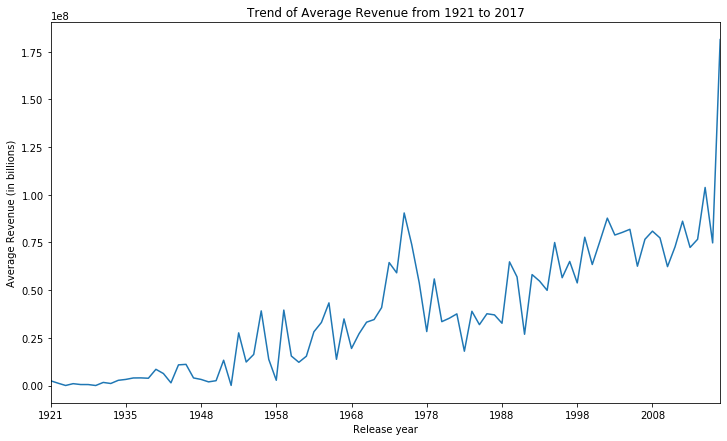

In [37]:
# Plot the average revenue of each year from 1921 to 2017"
movies['Revenue'].groupby(movies['Release year']).mean().plot(figsize=(12,7));
plt.title('Trend of Average Revenue from 1921 to 2017');
plt.ylabel('Average Revenue (in billions)');
plt.style.use('seaborn-bright');

**Insight**

As seen from the chart, from 1921 to now, the average movie revenues for each year was increasing with fluctuations, showing the industry is developing with a generally positive trend. One interesting insight is the revenue around 1970 has reached to a peak. One reason is probably because of the advent of the VCRS in the 1970s. Thanks to that, watching videotapes at home became a convenient and economical way to watch movies. VCRS and television became another source of revenue for film producers, which led to the revenue peak in that period. 

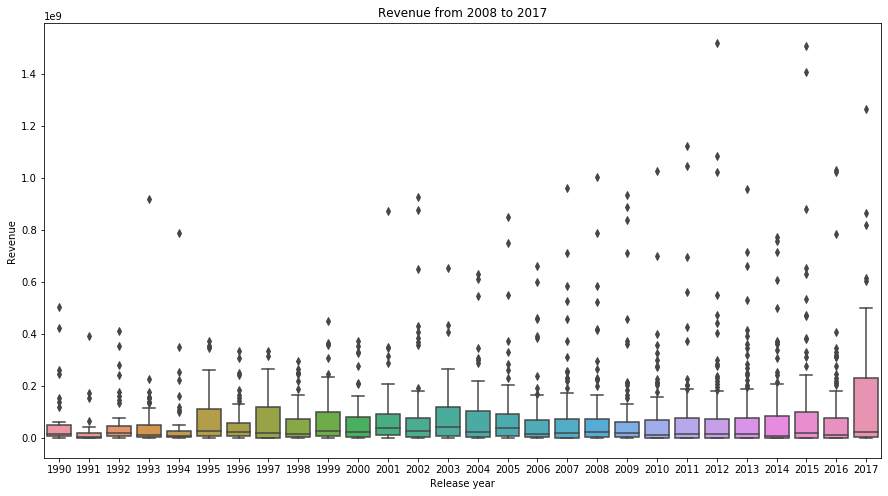

In [38]:
# Draw a boxplot to see the average revenues from 1990 to 2017
plt.figure(figsize=(15,8))
g = sns.boxplot(x=movies['Release year'][movies['Release year']>='1990'], y=movies['Revenue'])
plt.title('Revenue from 2008 to 2017');

**Insight**

It's interesting to find the medians and middle quantile ranges of box offices from 1990 to 2017 haven’t fluctuated very much, however, the 4th quartile are much higher since 2000s than in the 1990s, and the outlier movies with super high revenues appear more and more in recent years. One reason is since 2000, the Internet has become a new medium for the production, screening, distribution, and promotion of new films. Outstanding movies are easier to be seen and promoted by mass communication through Internet. Especially since 2010, We-media opens a new era for the film industry. Audiences love to share their comments and feelings on Facebook, Twitter, and movie rating websites. Thus, whether to watch a movie or not becomes a choice based on the popularity of the movie, or the movie's reputation judged by the audience. Under this situation, like Saint Matthew in The Bible, the successful movies will become even more successful, forming the outliers with astonishing box offices. 

To verify the idea, let's find some insights about Popularity: 

### 2. Insights about Popularity

In [39]:
# First, let's check the most popular movies (Popularity >= 60)
movies[movies['Popularity']>=60].sort_values('Revenue',ascending=False)

,Title,Original title,Popularity,Overview,Keywords,Genres,Collection,Original Language,Spoken Languages,Production Companies,...,Director,Release date,Runtime,Status,Tagline,Homepage,imdb_id,Budget,Revenue,Release year
ID,,,,,,,,,,,,,,,,,,,,,
1127,The Avengers,The Avengers,89.887648,When an unexpected enemy emerges and threatens...,"new york, shield, marvel comic, superhero, bas...","Science Fiction, Action, Adventure",The Avengers Collection,en,English,"Paramount Pictures, Marvel Studios",...,Joss Whedon,2012-04-25,143,Released,Some assembly required.,http://marvel.com/avengers_movie/,tt0848228,220000000,1519557910,2012
685,Beauty and the Beast,Beauty and the Beast,287.253654,A live-action adaptation of Disney's version o...,"france, magic, castle, fairy tale, musical, cu...","Family, Fantasy, Romance",Missing,en,English,"Walt Disney Pictures, Mandeville Films",...,Bill Condon,2017-03-16,129,Released,Be our guest.,http://movies.disney.com/beauty-and-the-beast-...,tt2771200,160000000,1262886337,2017
1674,The Dark Knight,The Dark Knight,123.167259,Batman raises the stakes in his war on crime. ...,"dc comics, crime fighter, secret identity, sca...","Drama, Action, Crime, Thriller",The Dark Knight Collection,en,"English, 普通话","DC Comics, Legendary Pictures, Warner Bros., D...",...,Christopher Nolan,2008-07-16,152,Released,Why So Serious?,http://thedarkknight.warnerbros.com/dvdsite/,tt0468569,185000000,1004558444,2008
2127,Guardians of the Galaxy Vol. 2,Guardians of the Galaxy Vol. 2,185.330992,The Guardians must fight to keep their newfoun...,"sequel, superhero, based on comic, misfit, spa...","Action, Adventure, Comedy, Science Fiction",Guardians of the Galaxy Collection,en,English,"Walt Disney Pictures, Marvel Studios",...,James Gunn,2017-04-19,137,Released,Obviously.,http://marvel.com/movies/movie/221/guardians_o...,tt3896198,200000000,863416141,2017
519,Wonder Woman,Wonder Woman,294.337037,An Amazon princess comes to the world of Man t...,"dc comics, hero, greek mythology, island, worl...","Action, Adventure, Fantasy",Wonder Woman Collection,en,"Deutsch, English","Dune Entertainment, Atlas Entertainment, Warne...",...,,2017-05-30,141,Released,Power. Grace. Wisdom. Wonder.,http://www.warnerbros.com/wonder-woman,tt0451279,149000000,820580447,2017
2327,Deadpool,Deadpool,187.860492,Deadpool tells the origin story of former Spec...,"anti hero, mercenary, marvel comic, superhero,...","Action, Adventure, Comedy",Deadpool Collection,en,English,"Twentieth Century Fox Film Corporation, Marvel...",...,Tim Miller,2016-02-09,108,Released,Witness the beginning of a happy ending,http://www.foxmovies.com/movies/deadpool,tt1431045,58000000,783112979,2016
1716,War for the Planet of the Apes,War for the Planet of the Apes,146.161786,Caesar and his apes are forced into a deadly c...,"based on novel, sequel, talking animal, ape","Drama, Science Fiction, War",Planet of the Apes (Reboot) Collection,en,English,Chernin Entertainment,...,Matt Reeves,2017-07-11,140,Released,For freedom. For family. For the planet.,http://www.foxmovies.com/movies/war-for-the-pl...,tt3450958,152000000,369907963,2017
1310,Gone Girl,Gone Girl,154.801009,With his wife's disappearance having become th...,"based on novel, marriage crisis, disappearance...","Mystery, Thriller, Drama",Missing,en,English,"Twentieth Century Fox Film Corporation, Regenc...",...,David Fincher,2014-10-01,145,Released,You don't know what you've got 'til it's...,http://www.gonegirlmovie.com/,tt2267998,61000000,369330363,2014
1696,Baby Driver,Baby Driver,228.032744,After being coerced into working for a crime b...,"robbery, atlanta, music, crime boss, romance, ...","Action, Crime",Missing,en,English,"Big Talk Productions, TriStar Pictures, Media ...",...,Edgar Wright,2017-06-28,113,Released,All you need is one killer track.,Missing,tt3890160,34000000,224511319,2017


**Insight**

From the dataframe above, it's not hard to find the most popular movies are almost all released after 2010, which proves that the We-media era enhances the effect of film promotion. Besides, Most of these most popular movies have a very considerable revenue, but is it a general trend? Let's see: 

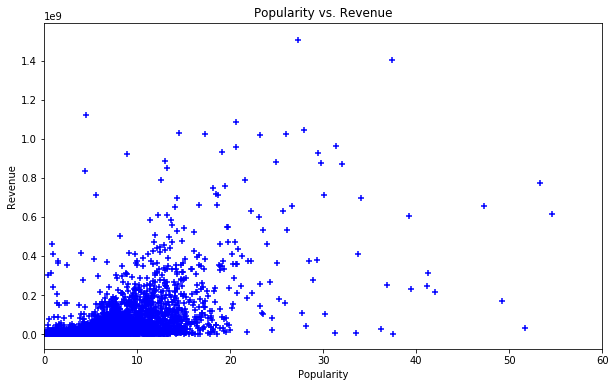

In [40]:
# Then, let's draw a scatter plot to see the relationship between Popularity and Revenue
plt.figure(figsize=(10,6))
plt.scatter(x=movies['Popularity'], y=movies['Revenue'],marker='+', color='blue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.xlim(0,60)
plt.title('Popularity vs. Revenue');

**Insight**

From the chart, we can see the relationship between Popularity and Revenue is relatively positively correlated. However, there are still many movies with a good reputation are not so profitable, vice versa (remember the example "Transformers: Age of Extinction" in the Setting part?). That is to say, Popularity is definitely an important factor but not the only decisive factor. 

However, it's still worthy to mention that the producers and directors should pay great attention to the We-media and audience's rating/feedback when producing and promoting new films. 

**Q: But what if the investment companies or producers want to make investing decisions? They probably do not even know how popular the new movie will be!**

**A: Good question! Now let's find some insights from the tangible aspects.** 

### 3. Which genre of movie is a box office smash? 

In [41]:
# Create dummies for genres
genre = movies['Genres'].str.get_dummies(sep=', ')

In [42]:
# Drop the column of "Missing"
genre.drop(columns='Missing',inplace=True)

In [43]:
# Since Each movie could belongs to multiple genres
# In order to calculate the revenue by genre, we times revenue with the genre dummy variables
# We define a function to multiply a column(could be revenue, popularity) with a data frame(the dummy variabels)

def get_value(df,value_column):
    for i in list(df.columns):
        df[i] = np.array(df[i])*np.array(movies[value_column])
    return df

In [44]:
revenue_by_genre = get_value(df=genre,value_column='Revenue')
revenue_by_genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
ID,,,,,,,,,,,,,,,,,,,,
1,0,0,0,12314651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,95149435,0,0,95149435,95149435,0,0,0,0,0,0,95149435,0,0,0,0,0
3,0,0,0,0,0,0,13092000,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,16000000,0,0,0,0,0,0,0,0,0,0,16000000,0,0
5,3923970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3923970,0,0


In [45]:
# Filter out the 0 values
a=revenue_by_genre[pd.notna(revenue_by_genre[revenue_by_genre!=0])]

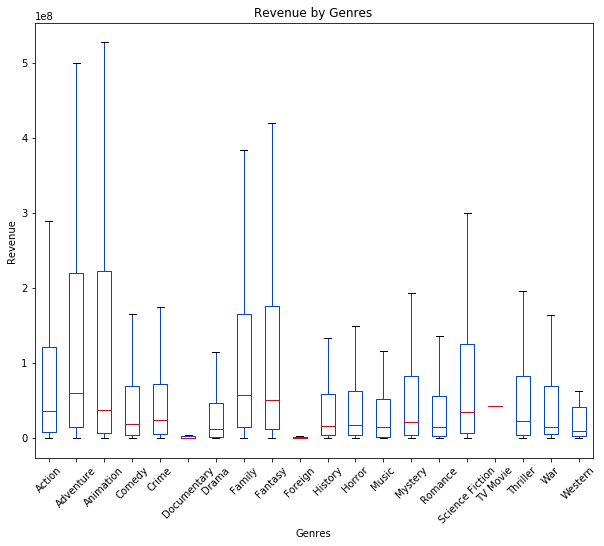

In [46]:
# plot the revenue by genre
bxplt = a.boxplot(grid=False, figsize=(10,8), rot=45, showfliers=False)
bxplt.set(xlabel='Genres',ylabel='Revenue', title = 'Revenue by Genres' );

**Insight**

As can be seen from the plot, Action, Adventure, Animation, Family, and Fantasy movies are genres that may largely like to produce a higher revenue. So It's usually safe to invest these genres of movies. Among these, probably the safest investment choice would be Family movies, which have a relatively higher average revenue. But if you are confident (and rich) enough, an investment to Animation movies may lead to an unexpected higher reward! Think about Zootopia -- 1.024 billion USD! 

**Or, you can make investment decisions based on Actors!**

### 4. Who are the most productive actors? 
**-- Those actors who have played roles in so many movies -- who may lead to a higher popularity.**

In [47]:
# Count how many movies each actor played
casts = cast_df['Actor Name'].value_counts()
# Keep the top 300 actors to avoid messy
cast_name = pd.DataFrame(casts[:300])
cast_name = cast_name.reset_index()

In [48]:
casts[:10]

Samuel L. Jackson    30
Robert De Niro       30
Morgan Freeman       27
Susan Sarandon       25
J.K. Simmons         25
Liam Neeson          25
Bruce Willis         25
John Turturro        24
Bruce McGill         24
Willem Dafoe         23
Name: Actor Name, dtype: int64

In [49]:
# Create a dictionary, key is the actor name and value is how many movies he/she played
dict1 = {}
for i in range(len(cast_name)):
    dict1[cast_name.iloc[i,0]]=cast_name.iloc[i,1]

In [50]:
from wordcloud import WordCloud

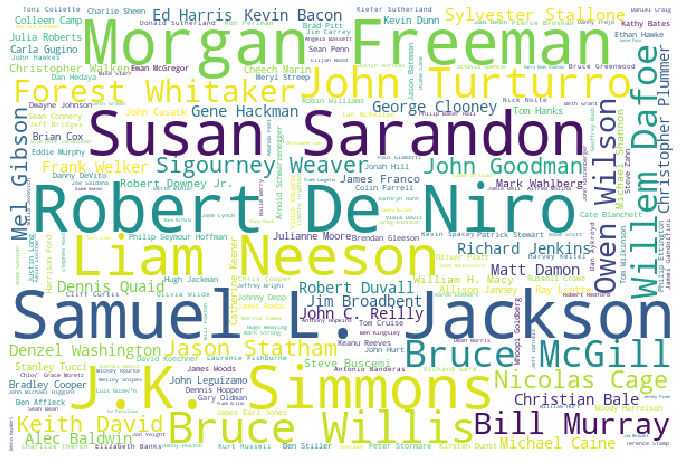

In [51]:
# Generate wordcould based on the dictionary, the larger the fequency, the bigger the font of the name
wc = WordCloud(background_color='white',width=600,height=400).generate_from_frequencies(dict1)
plt.figure(figsize=(12,9))
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.imshow(wc);

### 5. Who are the most bankable movie stars?
**-- Hey producers: these actors are more likely to guarantee a higher box office and you don't want to miss out.** 

In [52]:
# Calculate the total box office of movies that a specific actor played a role in
revenue = pd.DataFrame(cast_df['Revenue'].groupby(by=cast_df['Actor Name']).sum().sort_values(ascending=False))
revenue = revenue.reset_index()

In [53]:
# Keep the top 200 revenue
revenue = revenue[:200]

In [54]:
# Generate a dictionary, the key is actor name, and the value is the total revenue of movies they played a role in
actor_by_revenue = {}
for i in range(len(revenue)):
    actor_by_revenue[revenue.iloc[i,0]]=revenue.iloc[i,1]

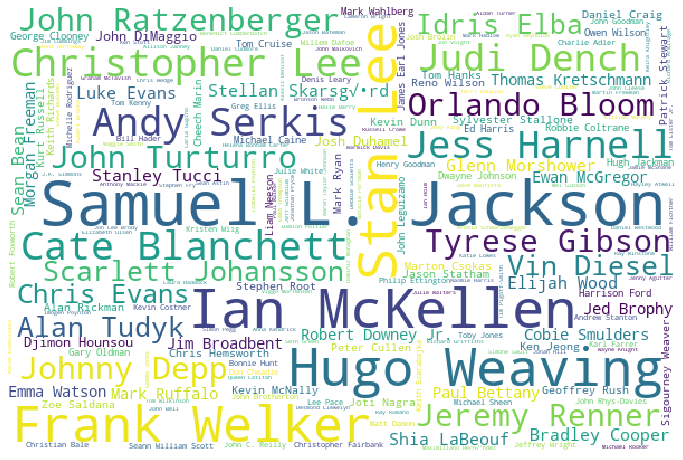

In [55]:
# Generate a word cloud
wc = WordCloud(background_color='white',width=600,height=400).generate_from_frequencies(actor_by_revenue)
plt.figure(figsize=(12,9))
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.imshow(wc);

### 6. Box office "lucky dogs"
**-- They might only played in only one movie, but that movie became the top-grossing -- I'm not saying you producers should be fetishistic, but if you are... here are references :)**  

In [56]:
revenue1 = pd.DataFrame(cast_df['Revenue'].groupby(by=cast_df['Actor Name']).mean().sort_values(ascending=False))
revenue1 = revenue1.reset_index()
revenue1 = revenue1[:200]

In [57]:
actor_by_revenue1 = {}
for i in range(len(revenue1)):
    actor_by_revenue1[revenue1.iloc[i,0]]=revenue1.iloc[i,1]

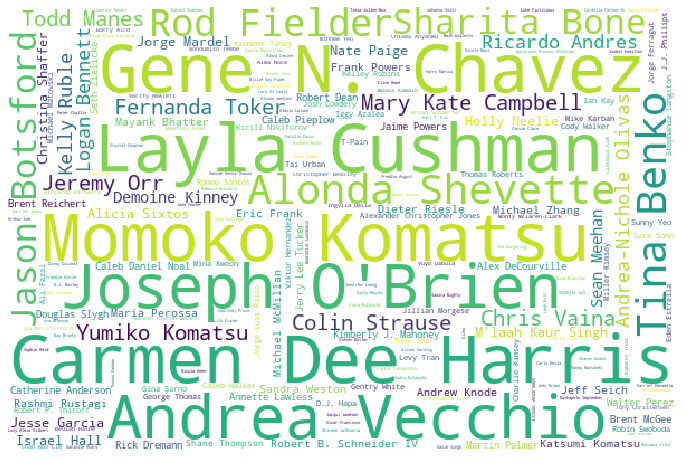

In [58]:
wc = WordCloud(background_color='white',width=600,height=400).generate_from_frequencies(actor_by_revenue1)
plt.figure(figsize=(12,9))
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.imshow(wc);

### 7. Outstanding Director Award goes to...?
**Audience's Choice -- the most popular director**

In [59]:
ODA = pd.DataFrame(movies['Popularity'].groupby(by=movies['Director']).mean().sort_values(ascending=False))
ODA = ODA.reset_index()
ODA = ODA[:200]

In [60]:
outstandingD = {}
for i in range(len(ODA)):
    outstandingD[ODA.iloc[i,0]]= ODA.iloc[i,1]

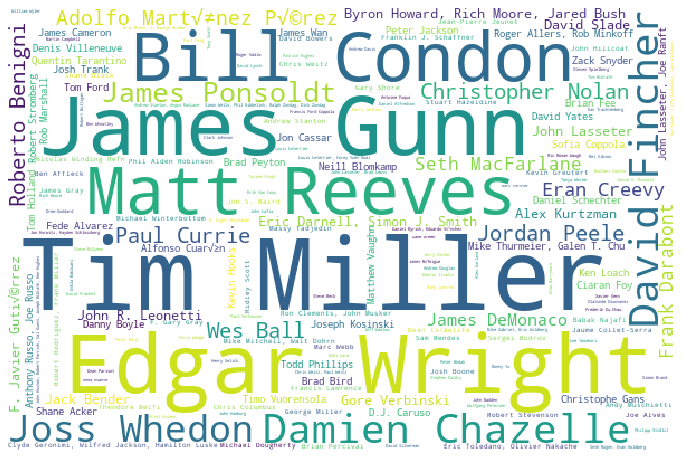

In [61]:
wc = WordCloud(background_color='white',width=600,height=400).generate_from_frequencies(outstandingD)
plt.figure(figsize=(12,9))
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.imshow(wc);

### 8. Secret behind Entitling (most frequent words in movie titles)
**-- When you see these words, there must be a lot of movies flashing in your mind, right?** 

In [62]:
movies['Title'][1]

'Hot Tub Time Machine 2'

In [63]:
# Get a bag of words of all movie titles
title_list = []
for i in movies['Title']:
    words = i.split(' ')
    title_list = title_list + words

In [64]:
from collections import Counter
from nltk.corpus import stopwords

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chongchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
## Remove stop words and numbers and 'A', 'The'
title_list = [title for title in title_list if title not in stopwords.words('english') and title not in ['1','2','3','4','5','&','III','A','The']]

In [67]:
# Generate a dictionary, key is word, value is the corresponding frequency
dict2 = {}
for i in title_list:
    if i not in dict2:
        dict2[i]=1
    else:
        dict2[i]= dict2[i]+1

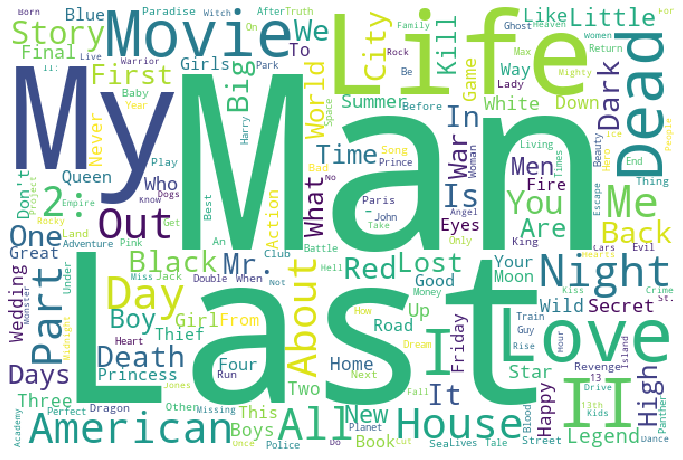

In [68]:
# Generate word cloud of words frequently appeared in film titles
wc = WordCloud(background_color='white',width=600,height=400).generate_from_frequencies(dict2)
plt.figure(figsize=(12,9))
plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.imshow(wc);

The most frequent words are "My", "Man", "Last", "Life", and "Love", etc. An intersting observation is that "2:", "II" are also frequently appear in the title of a movie. This indicates that some series of  movies are very successful, they use the same name, and differentiate with numbers such as "II" or "2:".

**Well, I think my next movie could be "About The Last Man I Love In My Dark Life, II". Deal!** 

### 9. Relationship between Budget and Revenue

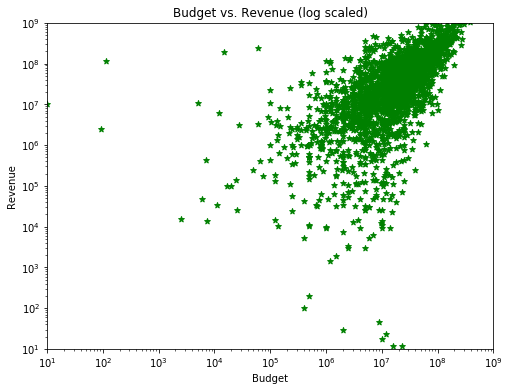

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x=movies['Budget'], y=movies['Revenue'],marker='*', color='green')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,1000000000)
plt.ylim(10,1000000000)
plt.title('Budget vs. Revenue (log scaled)');

In general, Budget and Revenue have a very "beautiful" **positive correlated relationship**. That means higher budget leads to higher revenue, which makes sense because every producer wants to cover the cost, at least. However, there are still some **outliers**, which attract our attention.

### 10. Low-budget films' counterattack

In [70]:
movies[movies['Budget']<100000][movies['Budget']>1000][movies['Revenue']>1000000]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,Original title,Popularity,Overview,Keywords,Genres,Collection,Original Language,Spoken Languages,Production Companies,...,Director,Release date,Runtime,Status,Tagline,Homepage,imdb_id,Budget,Revenue,Release year
ID,,,,,,,,,,,,,,,,,,,,,
268,Clerks,Clerks,10.513367,Convenience and video store clerks Dante and R...,"salesclerk, loser, aftercreditsstinger",Comedy,Clerks Collection,en,English,"Miramax Films, View Askew Productions",...,Kevin Smith,1994-09-13,92,Released,Just because they serve you doesn't mean they ...,http://www.miramax.com/movie/clerks/,tt0109445,27000,3151130,1994
509,Pi,Pi,10.621362,The debut film from Darren Aronofsky in which ...,"hacker, mathematician, helix, headache, chaos ...","Mystery, Drama, Thriller",Missing,en,English,"Truth and Soul Pictures Inc, Protozoa Pictures...",...,Darren Aronofsky,1998-07-10,84,Released,"There will be no order, only chaos",http://www.pithemovie.com/,tt0138704,60000,3221152,1998
589,Macabre,Macabre,0.837849,A doctor's daughter is kidnapped and buried al...,"nurse, mother, based on novel, widow, investig...","Horror, Thriller",Missing,en,English,William Castle Productions,...,William Castle,2058-10-01,72,Released,As Blood-Chilling As Being Buried Alive!,Missing,tt0051885,90000,5000000,1958
1231,Paranormal Activity,Paranormal Activity,12.706424,"After a young, middle class couple moves into ...","haunting, psychic, entity, demonic possession,...","Horror, Mystery",Paranormal Activity Collection,en,English,"Blumhouse Productions, Solana Films",...,Oren Peli,2007-09-14,86,Released,What Happens When You Sleep?,http://www.paranormalactivity-movie.com/,tt1179904,15000,193355800,2007
1680,The Blair Witch Project,The Blair Witch Project,14.838386,In October of 1994 three student filmmakers di...,"witch, voodoo, legend, sorcery, maryland, fore...","Horror, Mystery",Blair Witch Collection,en,English,"Artisan Entertainment, Haxan Films",...,"Daniel Myrick, Eduardo S√°nchez",1999-07-14,81,Released,The scariest movie of all time is a true story.,http://www.blairwitch.com/,tt0185937,60000,248000000,1999
1894,Pink Flamingos,Pink Flamingos,5.738871,Notorious Baltimore criminal and underground f...,"gay, trailer park, pop culture, drug dealer, h...","Horror, Comedy, Crime",Missing,en,English,Dreamland Productions,...,John Waters,1972-03-12,93,Released,An exercise in poor taste.,Missing,tt0069089,12000,6000000,1972
2611,The Tiger: An Old Hunter's Tale,대호,3.447894,While the Kingdom of Korea is under occupation...,"hunter, mountain, tiger, snow, korean movie","Action, Adventure, History, Thriller",Missing,ko,"日本語, 한국어/조선말","Next Entertainment World, Sanai Pictures",...,Park Hoon-Jung,2015-12-16,139,Released,Missing,Missing,tt5066556,5000,11083449,2015


## Part 4 Modeling
### 1. Model Specialty Introduction

We build a linear regression model to predict the box office. In the model, we want to include as much “important” information as possible, such as “Keywords”, “Director”, and “Production Companies”, which play important roles in the revenue generation of a movie. However, except for the numerical variables, there will be too many dummies variables if we include all these variables as categorical variables to build the model. For example, for the “Keywords” column, it has more than 7000 unique values, which means 7,000 dummy variables, not to mention “Director” and so on.

Thus, we decide to filter out the unnecessary information to reduce the number of variables. For example, by filtering the key words that only appear 30 times or more, including these sub-categories in the model, we will have much less dummy variables instead of 7000 dummy variables. Same for the other categorical variables that have too many levels or values. In this way, we can keep more important information that will be used to predict the revenue.

### 2. Get dummy variables

In [94]:
genre = movies['Genres'].str.get_dummies(sep=', ')

In [95]:
# Create the independent variables set
movies_sample = movies.loc[:,['Popularity','Keywords', 'Collection', 'Original Language', 
       'Production Companies', 'Production Countries', 'Director',
        'Runtime', 'Status','Budget','Release year', 'Revenue']]

In [97]:
# merge with genre dummy variables
movies_sample= movies_sample.join(genre)
movies_sample.head()

,Popularity,Keywords,Collection,Original Language,Production Companies,Production Countries,Director,Runtime,Status,Budget,...,Horror,Missing,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
ID,,,,,,,,,,,,,,,,,,,,,
1,6.575393,"time travel, sequel, hot tub, duringcreditssti...",Hot Tub Time Machine Collection,en,"Paramount Pictures, United Artists, Metro-Gold...",United States of America,Steve Pink,93,Released,14000000,...,0,0,0,0,0,0,0,0,0,0
2,8.248895,"coronation, duty, marriage, falling in love",The Princess Diaries Collection,en,Walt Disney Pictures,United States of America,Garry Marshall,113,Released,40000000,...,0,0,0,0,1,0,0,0,0,0
3,64.299990,"jazz, obsession, conservatory, music teacher, ...",Missing,en,"Bold Films, Blumhouse Productions, Right of Wa...",United States of America,Damien Chazelle,105,Released,3300000,...,0,0,0,0,0,0,0,0,0,0
4,3.174936,"mystery, bollywood, police corruption, crime, ...",Missing,hi,,India,Sujoy Ghosh,122,Released,1200000,...,0,0,0,0,0,0,0,1,0,0
5,1.148070,Missing,Missing,ko,,South Korea,Jong-seok Yoon,118,Released,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
# Convert Collection
movies_sample['Collection']=movies_sample['Collection'].apply(lambda x: 1 if x!='Missing' else 0)

In [99]:
# Impute missing values in Runtime
movies_sample['Runtime']=movies_sample['Runtime'].apply(lambda x: 0 if x=='Missing' else x)

In [100]:
movies_sample.columns

Index(['Popularity', 'Keywords', 'Collection', 'Original Language',
       'Production Companies', 'Production Countries', 'Director', 'Runtime',
       'Status', 'Budget', 'Release year', 'Revenue', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Missing', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

### 3. Train Linear Regression

In [101]:
model = smf.ols('Revenue~Popularity+C(Collection)+Runtime+Budget+Action+Adventure+Animation+Comedy+Crime+Documentary+Drama+Family+Fantasy+Foreign+History+Horror+Missing+Music+Mystery+Romance+Thriller+War+Western', data = movies_sample).fit()

In [102]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     243.1
Date:                Thu, 12 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:01:59   Log-Likelihood:                -58888.
No. Observations:                3000   AIC:                         1.178e+05
Df Residuals:                    2976   BIC:                         1.180e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.987e+07   9.17

In [103]:
model2 = smf.ols('Revenue~Popularity+C(Collection)+Runtime+Budget+Action+Adventure+Animation', data = movies_sample).fit()

In [104]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     782.4
Date:                Thu, 12 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:06:11   Log-Likelihood:                -58914.
No. Observations:                3000   AIC:                         1.178e+05
Df Residuals:                    2992   BIC:                         1.179e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.095e+07   7.75